In [1]:
import torch

b = 100
h = 1
c = 6
t = 1
dim = 4
emb = 103
data = [torch.randn(c, dim).numpy()]


queries = torch.randn(b, c*dim, h, emb)
keys = torch.randn(b, c*dim, h, emb)
values = torch.randn(b, c*dim, h, emb)

scale = 0.1

scores = torch.einsum("blhe,bshe->bhls", queries, keys)
A = torch.nan_to_num(torch.softmax(scale * scores, dim=-1))
A.shape

torch.Size([100, 1, 24, 24])

In [2]:
torch.set_printoptions(linewidth=100000)
A[0,0,:,:]

tensor([[2.2571e-02, 1.7416e-02, 2.0170e-01, 1.7309e-02, 5.9722e-02, 1.0876e-02, 3.7482e-02, 3.9361e-02, 6.0801e-03, 6.5533e-03, 1.1923e-01, 5.4213e-03, 1.8694e-02, 2.7954e-02, 3.8681e-02, 1.5660e-02, 8.8668e-03, 8.8840e-03, 5.3240e-02, 4.2641e-03, 1.1481e-01, 1.4101e-01, 4.3967e-03, 1.9814e-02],
        [7.4403e-02, 5.7324e-02, 1.0482e-02, 6.0928e-02, 1.7777e-02, 2.0151e-02, 7.5905e-03, 8.6474e-03, 1.1673e-01, 2.6001e-02, 2.8036e-02, 4.2856e-02, 2.7188e-01, 1.0742e-02, 1.4615e-02, 1.2505e-02, 6.9217e-03, 1.0970e-02, 1.2203e-02, 9.3959e-02, 5.1724e-02, 1.6976e-02, 9.2948e-03, 1.7283e-02],
        [1.4235e-01, 2.4714e-02, 8.8308e-02, 6.7722e-03, 3.6468e-02, 2.3351e-01, 8.0062e-03, 6.0894e-03, 3.3408e-02, 3.8963e-02, 4.3362e-02, 1.1972e-02, 3.5201e-03, 1.6684e-02, 5.3534e-02, 2.4261e-02, 3.8389e-02, 8.6687e-03, 1.7849e-02, 6.1118e-03, 2.4564e-02, 4.3327e-03, 2.1738e-02, 1.0643e-01],
        [2.2280e-02, 4.5128e-03, 2.1765e-02, 1.3905e-02, 1.2154e-02, 3.5890e-02, 2.2852e-02, 4.4840e-03, 1

In [3]:
import numpy as np
def insert_dividers(matrix):
    total_rows, total_cols = matrix.shape

    # Insert row dividers
    insert_positions = np.arange(c, total_rows, c)
    insert_positions = np.repeat(insert_positions, t)  # repeat the insert positions for each row divider
    matrix = np.insert(matrix, insert_positions, np.nan, axis=0)

    # Update total_rows and total_cols after row dividers insertion
    total_rows, total_cols = matrix.shape

    # Insert column dividers
    insert_positions = np.arange(c, total_cols, c)
    insert_positions = np.repeat(insert_positions, t)  # repeat the insert positions for each column divider
    matrix = np.insert(matrix, insert_positions, np.nan, axis=1)

    return matrix

In [4]:
attention = A[0,0,:,:].numpy()

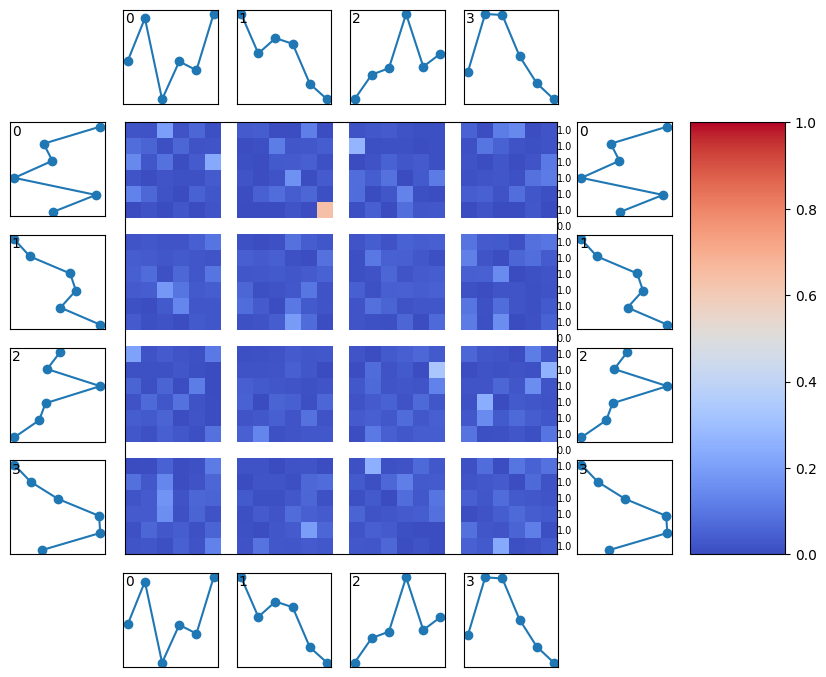

In [25]:
import matplotlib.pyplot as plt

height=10

f = plt.figure(figsize=(height, height))
gs = plt.GridSpec(dim+3,dim+3)
att_with_dividers = insert_dividers(attention)
    

ax_att = f.add_subplot(gs[1:-2, 1:-2])
cbar_ax = f.add_subplot(gs[1:-2, -1])
y_plots_left = [f.add_subplot(gs[i+1, 0]) for i in range(dim)]
y_plots_right = [f.add_subplot(gs[i+1, -2]) for i in range(dim)]
x_plots_bottom = [f.add_subplot(gs[-2, 1+i]) for i in range(dim)]
x_plots_top = [f.add_subplot(gs[0, 1+i]) for i in range(dim)]

ts_plots = y_plots_left + y_plots_right + x_plots_bottom + x_plots_top

# turn off x and y axis for x_plots and y_plots
for i in range(len(ts_plots)):
    ts_plots[i].set_xticks([])
    ts_plots[i].set_yticks([])
ax_att.set_xticks([])
ax_att.set_yticks([])

# put a text box representing the index in the top left corner of each ts_plot
size = 10
for i in range(dim):
    y_plots_left[i].text(0.02, 0.98, str(i), transform=y_plots_left[i].transAxes, fontsize=size, verticalalignment='top')
    y_plots_right[i].text(0.02, 0.98, str(i), transform=y_plots_right[i].transAxes, fontsize=size, verticalalignment='top')
    x_plots_bottom[i].text(0.02, 0.98, str(i), transform=x_plots_bottom[i].transAxes, fontsize=size, verticalalignment='top')
    x_plots_top[i].text(0.02, 0.98, str(i), transform=x_plots_top[i].transAxes, fontsize=size, verticalalignment='top')


time = np.arange(c)
for i in range(dim):
    y_plots_left[i].plot(data[0][:,i],time, marker='o', color='C0')
    y_plots_right[i].plot(data[0][:,i],time, marker='o', color='C0')
    x_plots_bottom[i].plot(time, data[0][:,i], marker='o', color='C0')
    x_plots_top[i].plot(time, data[0][:,i], marker='o', color='C0')


att_plot = ax_att.imshow(att_with_dividers, interpolation='nearest', cmap='coolwarm', vmin=0, vmax=1)
sums = np.nansum(att_with_dividers, axis=-1)
for i, sum_val in enumerate(sums):
    # Position the text to the right of the last column of ax_att
    ax_att.text(att_with_dividers.shape[1]-.5, i, f"{sum_val:.1f}", va='center', ha='left', fontsize=7)

cbar = f.colorbar(att_plot, cax=cbar_ax)

In [39]:
attention.shape

(75, 75)

In [40]:
attention = A[0,0,:,:].numpy()

loc_att = rearrange(attention, '(h n) (w m) -> h w n m', n=25, m=25)

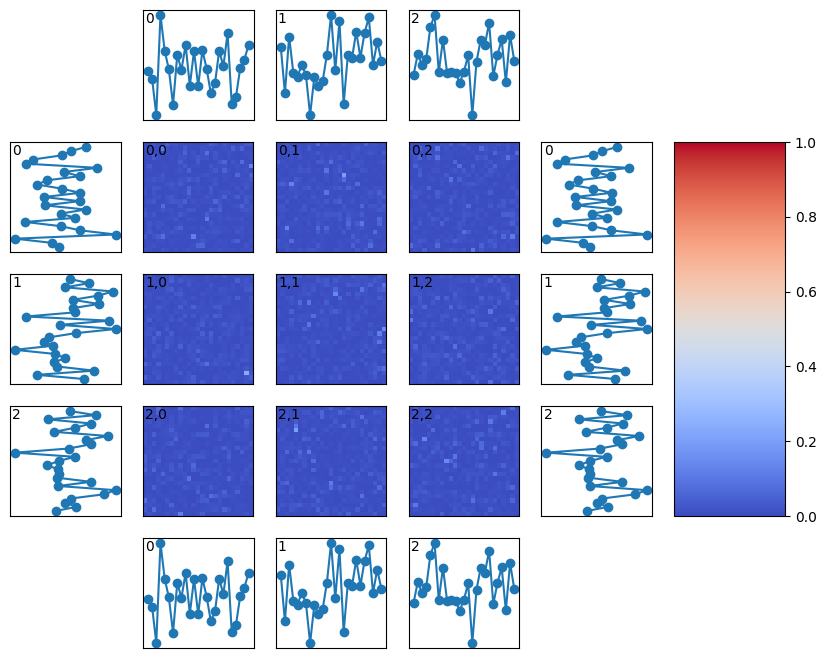

In [44]:
import matplotlib.pyplot as plt
import torch
from einops import rearrange

b = 1000
h = 1
c = 25
t = 2
dim = 3
emb = 100
data = [torch.randn(c, dim).numpy()]


queries = torch.randn(b, c*dim, h, emb)
keys = torch.randn(b, c*dim, h, emb)
values = torch.randn(b, c*dim, h, emb)

scale = 0.1

scores = torch.einsum("blhe,bshe->bhls", queries, keys)
A = torch.nan_to_num(torch.softmax(scale * scores, dim=-1))
A.shape
attention = A[0,0,:,:].numpy()

height=10

f = plt.figure(figsize=(height, height))
gs = plt.GridSpec(dim+3,dim+3)
loc_att = rearrange(attention, '(h n) (w m) -> h w n m', n=c, m=c)
    

ax_att_plots = []
for i in range(dim):
    for j in range(dim):
        ax_att_plots.append(f.add_subplot(gs[i+1, j+1]))
        ax_att_plots[-1].set_xticks([])
        ax_att_plots[-1].set_yticks([])
        ax_att_plots[-1].text(0.02, 0.98, f"{i},{j}", transform=ax_att_plots[-1].transAxes, fontsize=10, verticalalignment='top')
        att_plot = ax_att_plots[-1].imshow(loc_att[i,j,:,:], interpolation='nearest', cmap='coolwarm', vmin=0, vmax=1)
cbar_ax = f.add_subplot(gs[1:-2, -1])
y_plots_left = [f.add_subplot(gs[i+1, 0]) for i in range(dim)]
y_plots_right = [f.add_subplot(gs[i+1, -2]) for i in range(dim)]
x_plots_bottom = [f.add_subplot(gs[-2, 1+i]) for i in range(dim)]
x_plots_top = [f.add_subplot(gs[0, 1+i]) for i in range(dim)]

ts_plots = y_plots_left + y_plots_right + x_plots_bottom + x_plots_top

# turn off x and y axis for x_plots and y_plots
for i in range(len(ts_plots)):
    ts_plots[i].set_xticks([])
    ts_plots[i].set_yticks([])
ax_att.set_xticks([])
ax_att.set_yticks([])

# put a text box representing the index in the top left corner of each ts_plot
size = 10
for i in range(dim):
    y_plots_left[i].text(0.02, 0.98, str(i), transform=y_plots_left[i].transAxes, fontsize=size, verticalalignment='top')
    y_plots_right[i].text(0.02, 0.98, str(i), transform=y_plots_right[i].transAxes, fontsize=size, verticalalignment='top')
    x_plots_bottom[i].text(0.02, 0.98, str(i), transform=x_plots_bottom[i].transAxes, fontsize=size, verticalalignment='top')
    x_plots_top[i].text(0.02, 0.98, str(i), transform=x_plots_top[i].transAxes, fontsize=size, verticalalignment='top')


time = np.arange(c)
for i in range(dim):
    y_plots_left[i].plot(data[0][:,i],time, marker='o', color='C0')
    y_plots_right[i].plot(data[0][:,i],time, marker='o', color='C0')
    x_plots_bottom[i].plot(time, data[0][:,i], marker='o', color='C0')
    x_plots_top[i].plot(time, data[0][:,i], marker='o', color='C0')


# att_plot = ax_att.imshow(att_with_dividers, interpolation='nearest', cmap='coolwarm', vmin=0, vmax=1)
# sums = np.nansum(att_with_dividers, axis=-1)
# for i, sum_val in enumerate(sums):
#     # Position the text to the right of the last column of ax_att
#     ax_att.text(att_with_dividers.shape[1]-.5, i, f"{sum_val:.1f}", va='center', ha='left', fontsize=7)

cbar = f.colorbar(att_plot, cax=cbar_ax)

In [ ]:
gs

In [ ]:
A[0,0,:,:].sum(dim=-1)

In [ ]:
A[0,0,:,:].sum(dim=0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
context = 32
dim_y = 8
col_divider_width = 2
row_divider_width = 10

# Function to insert dividers
def insert_dividers(matrix, context_size, row_divider_width, col_divider_width):
    total_rows, total_cols = matrix.shape

    # Insert row dividers
    insert_positions = np.arange(context_size, total_rows, context_size)
    insert_positions = np.repeat(insert_positions, row_divider_width)     # repeat the insert positions for each row divider
    matrix = np.insert(matrix, insert_positions, np.nan, axis=0)

    # Update total_rows and total_cols after row dividers insertion
    total_rows, total_cols = matrix.shape

    # Insert column dividers
    insert_positions = np.arange(context_size, total_cols, context_size)
    insert_positions = np.repeat(insert_positions, col_divider_width)     # repeat the insert positions for each column divider
    matrix = np.insert(matrix, insert_positions, np.nan, axis=1)

    return matrix

# Generate the attention matrix
att = np.arange(context * dim_y, dtype=np.float32)
att = np.tile(att, (context * dim_y, 1))
num_blocks = dim_y

# Insert dividers
att_with_dividers = insert_dividers(att, context, row_divider_width, col_divider_width)

# # Plotting
# plt.figure(figsize=(5, 5))
plt.imshow(att_with_dividers, cmap='viridis')

# ticks
x_tick_idx = [context * i + i * col_divider_width for i in range(num_blocks)]
x_tick_labels = [str(i) for i in range(num_blocks)]
y_tick_idx = [context * i + i * row_divider_width for i in range(num_blocks)]
y_tick_labels = [str(i) for i in range(num_blocks)]
plt.xticks(x_tick_idx, x_tick_labels)
plt.yticks(y_tick_idx, y_tick_labels)
plt.tick_params(top=True, right=True, labeltop=True, labelright=True)

plt.grid(False)
plt.show()


In [ ]:
def temp(att, context, dim_y, col_divider_width, row_divider_width):
    def insert_dividers(matrix, context_size, row_divider_width, col_divider_width):
        total_rows, total_cols = matrix.shape

        # Insert row dividers
        insert_positions = np.arange(context_size, total_rows, context_size)
        insert_positions = np.repeat(insert_positions, row_divider_width)     # repeat the insert positions for each row divider
        matrix = np.insert(matrix, insert_positions, np.nan, axis=0)

        # Update total_rows and total_cols after row dividers insertion
        total_rows, total_cols = matrix.shape

        # Insert column dividers
        insert_positions = np.arange(context_size, total_cols, context_size)
        insert_positions = np.repeat(insert_positions, col_divider_width)     # repeat the insert positions for each column divider
        matrix = np.insert(matrix, insert_positions, np.nan, axis=1)

        return matrix

    num_blocks = dim_y

    # Insert dividers
    att_with_dividers = insert_dividers(att, context, row_divider_width, col_divider_width)

    # # Plotting
    plt.figure(figsize=(5, 5))
    plt.imshow(att_with_dividers, cmap='viridis')

    # ticks
    x_tick_idx = [context * i + i * col_divider_width for i in range(num_blocks)]
    x_tick_labels = [str(i) for i in range(num_blocks)]
    y_tick_idx = [context * i + i * row_divider_width for i in range(num_blocks)]
    y_tick_labels = [str(i) for i in range(num_blocks)]
    plt.xticks(x_tick_idx, x_tick_labels)
    plt.yticks(y_tick_idx, y_tick_labels)
    plt.tick_params(top=True, right=True, labeltop=True, labelright=True)
    plt.show()